In [1]:
# Heart Disease EDA Notebook Template
# Save this as notebooks/01_eda.ipynb

"""
# Heart Disease Prediction - Exploratory Data Analysis

## 1. Setup and Data Loading
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/raw/heart_disease_with_headers.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:

"""
## 2. Basic Information
"""

# Dataset info
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.4

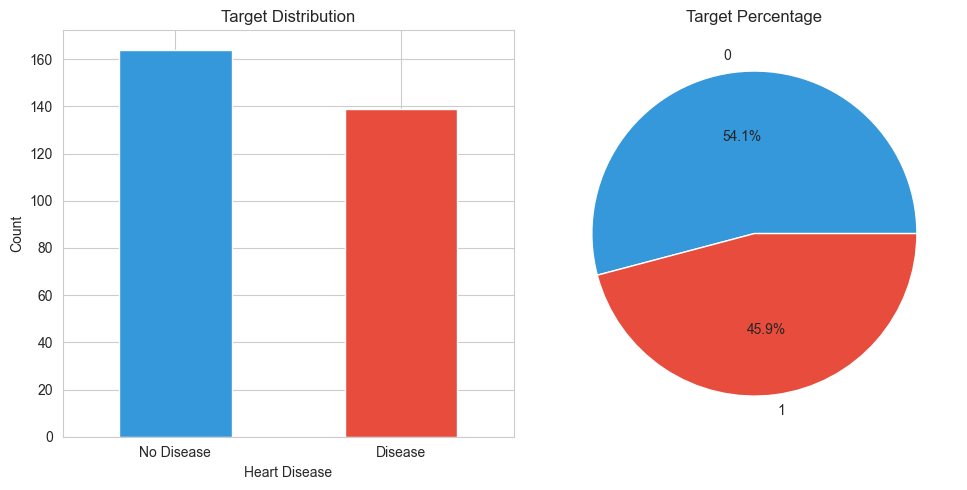

Class balance: target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [3]:

"""
## 3. Target Variable Analysis
"""

# Target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)

plt.subplot(1, 2, 2)
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])
plt.title('Target Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Class balance: {df['target'].value_counts(normalize=True)}")


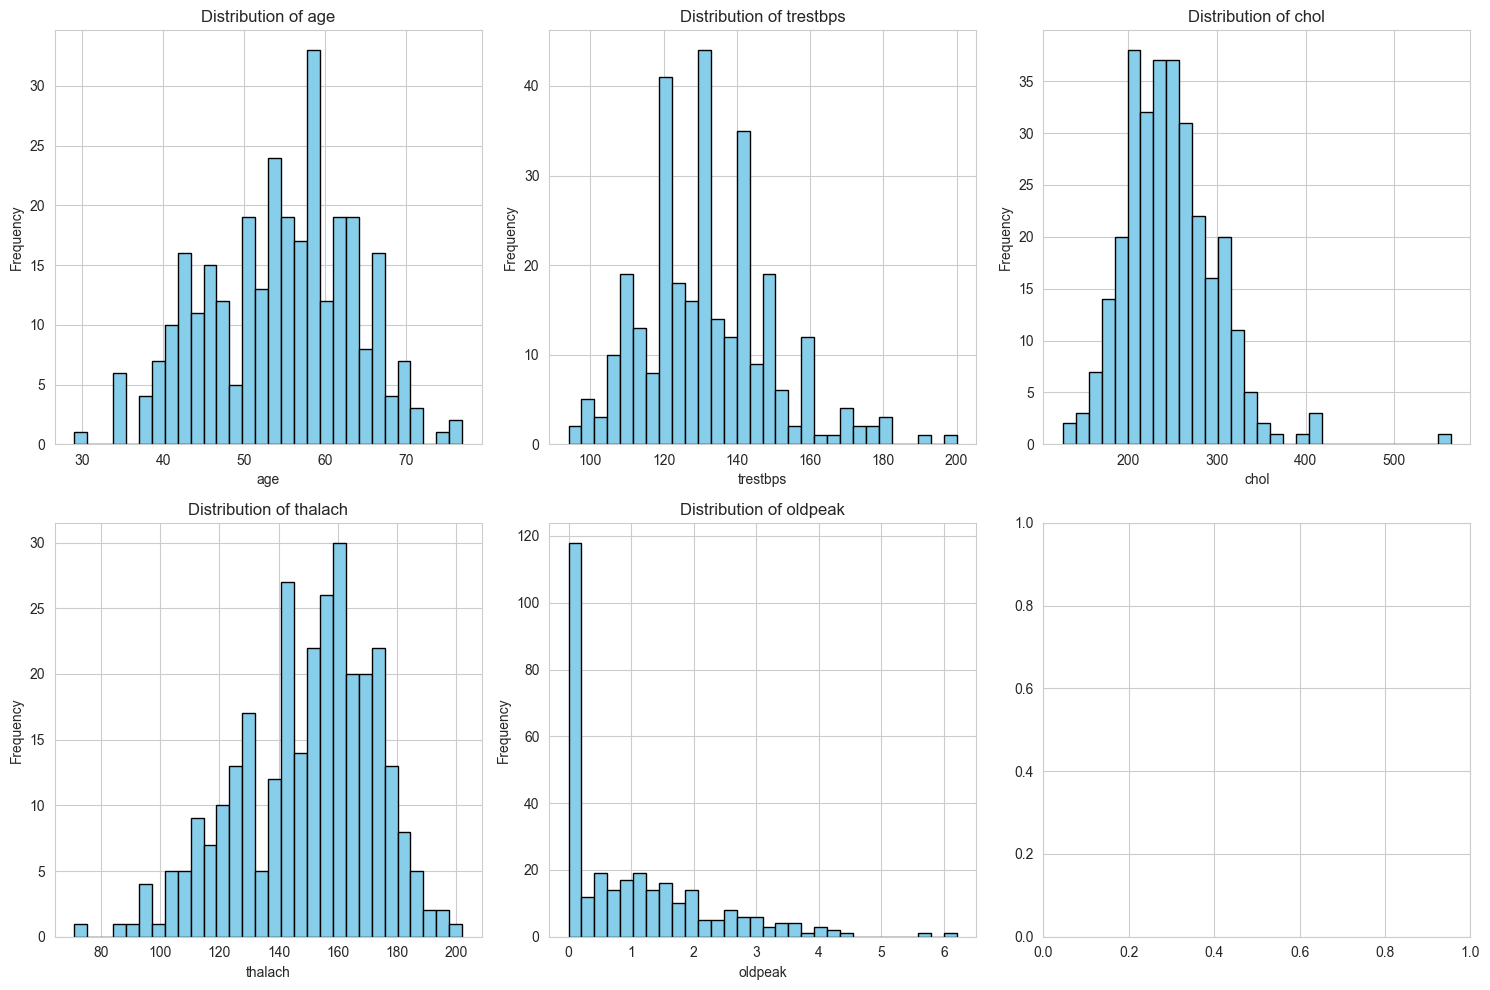

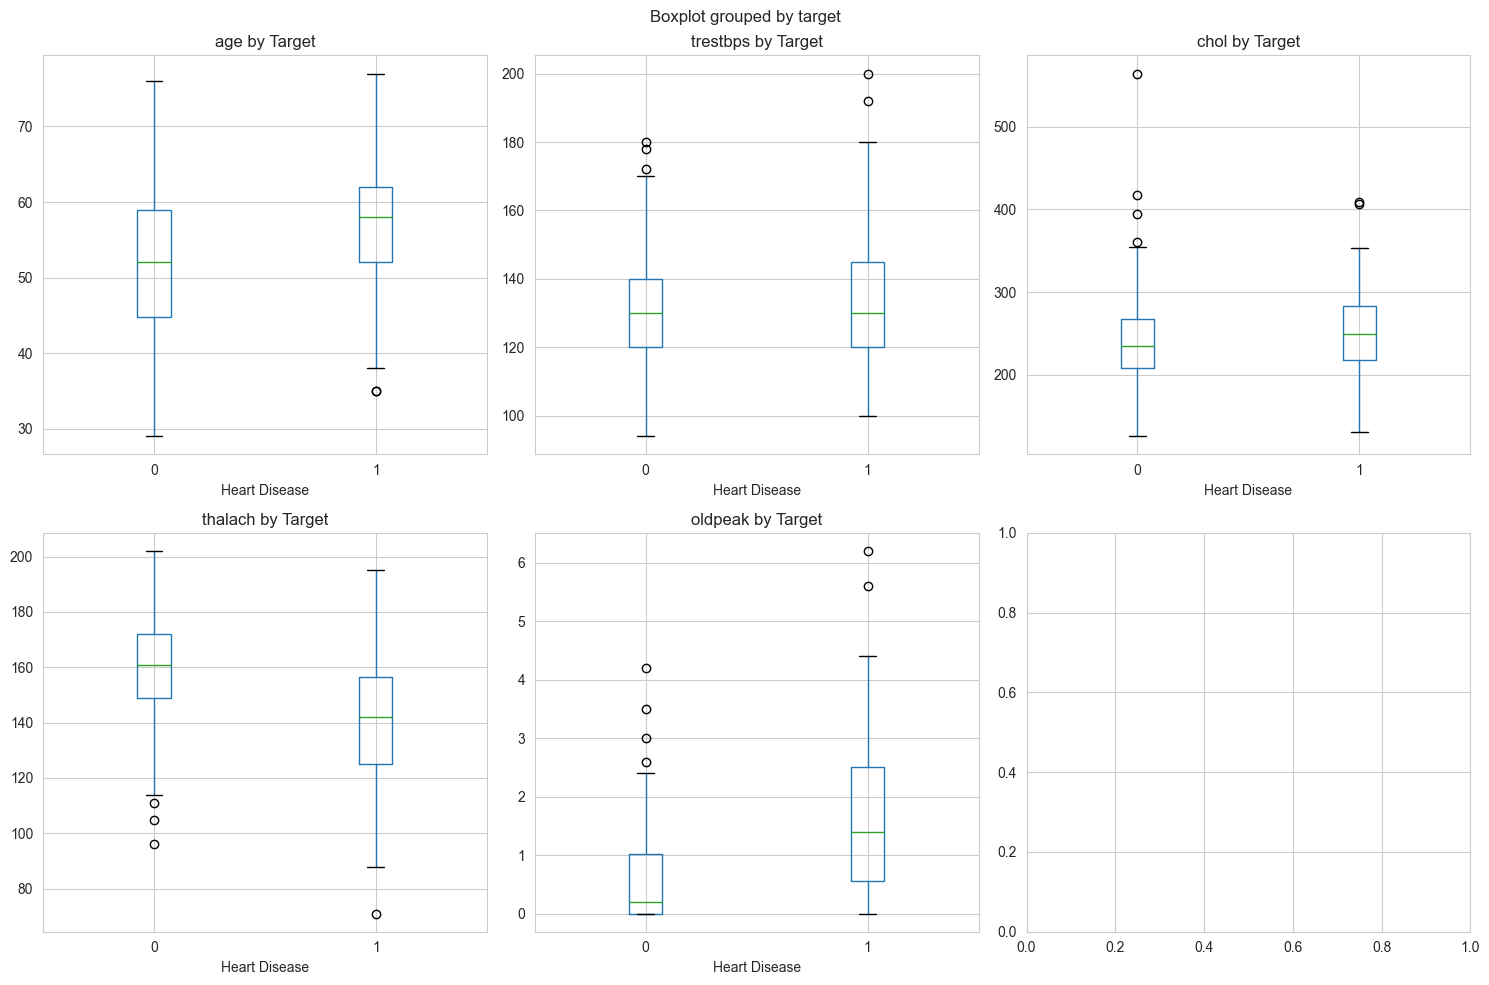

In [4]:

"""
## 4. Numerical Features Analysis
"""

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='target', ax=axes[idx])
    axes[idx].set_title(f'{col} by Target')
    axes[idx].set_xlabel('Heart Disease')

plt.tight_layout()
plt.show()


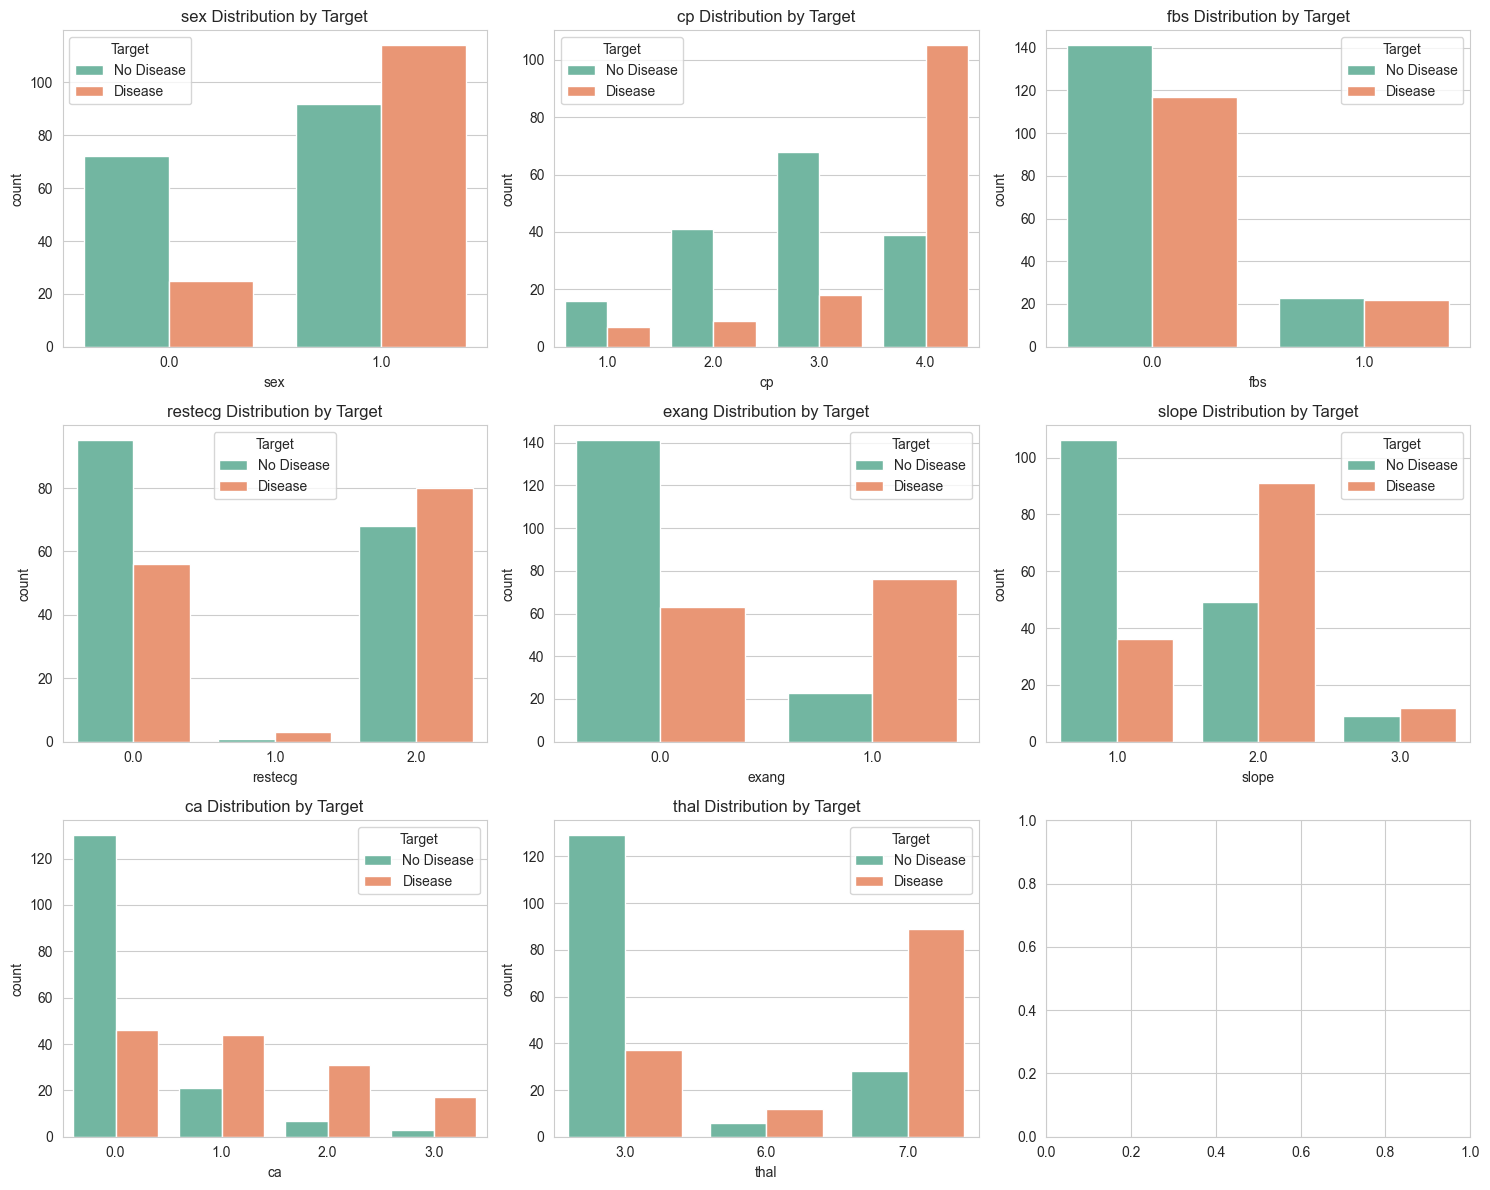

In [5]:

"""
## 5. Categorical Features Analysis
"""

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Count plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        sns.countplot(data=df, x=col, hue='target', ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'{col} Distribution by Target')
        axes[idx].legend(title='Target', labels=['No Disease', 'Disease'])

plt.tight_layout()
plt.show()


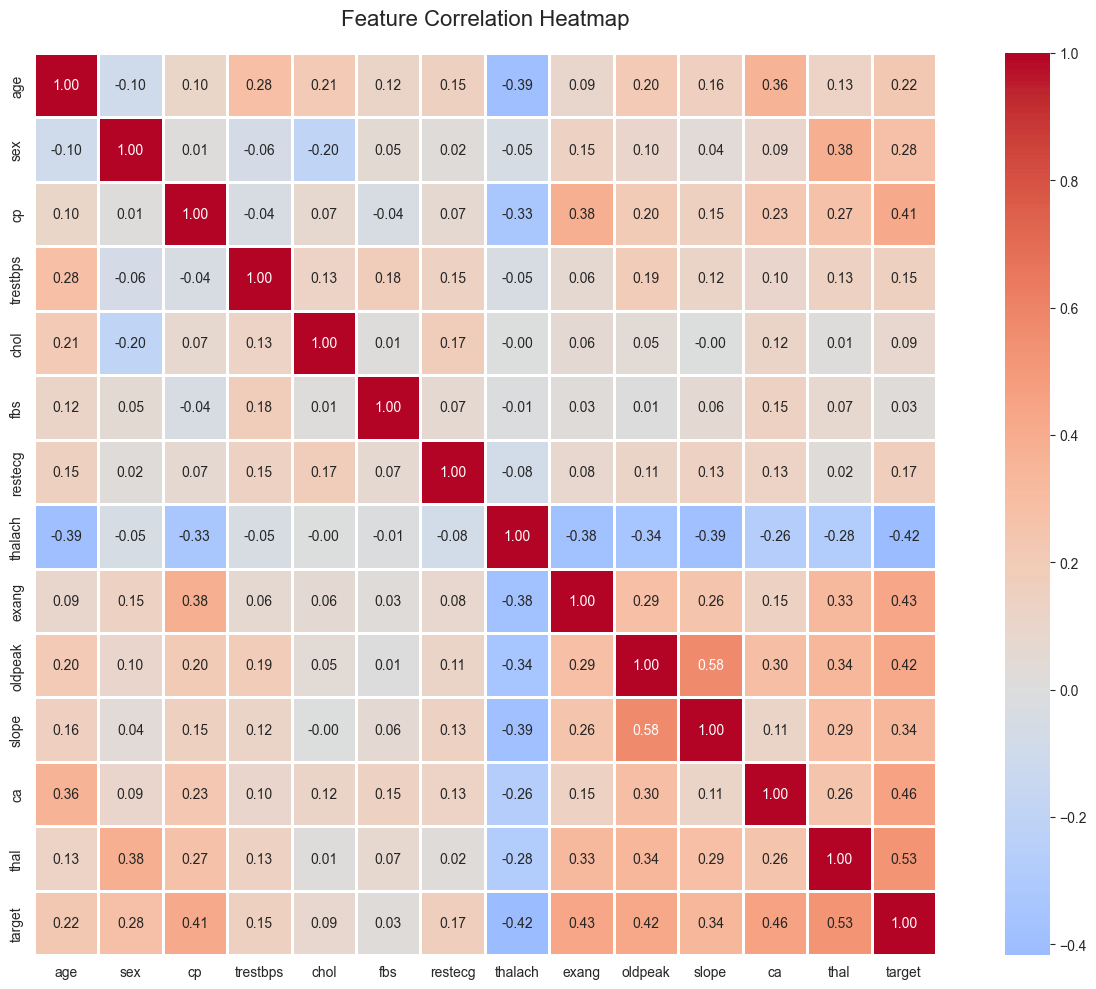


Top correlations with target:
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [6]:

"""
## 6. Correlation Analysis
"""

# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nTop correlations with target:")
print(target_corr)


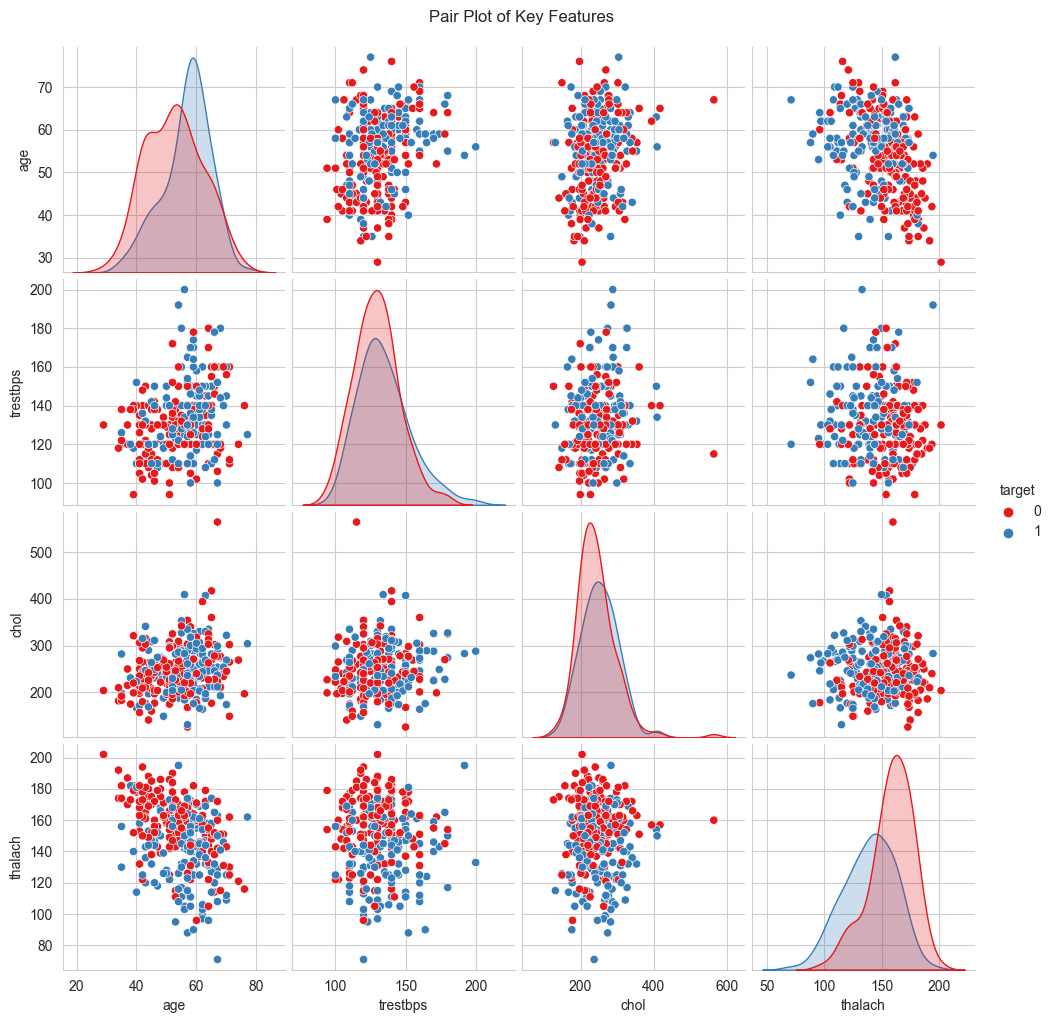

In [7]:

"""
## 7. Pair Plots
"""

# Select key features for pair plot
key_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[key_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


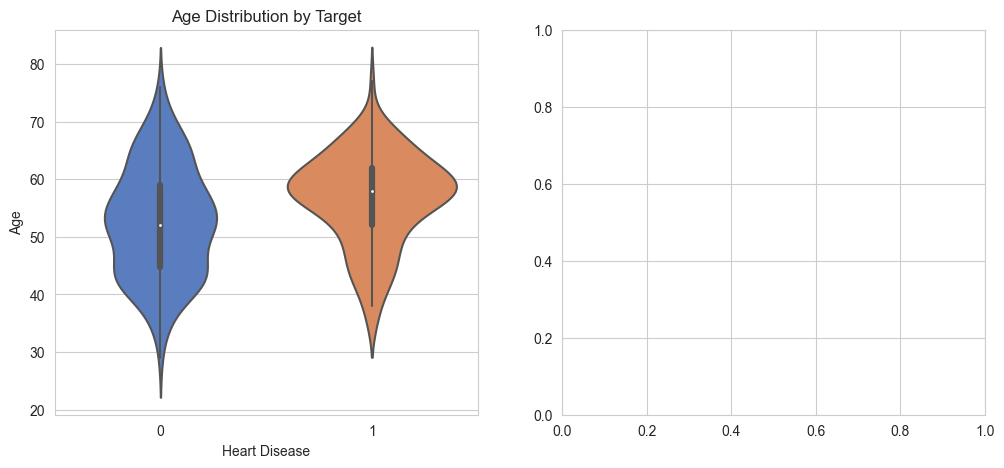

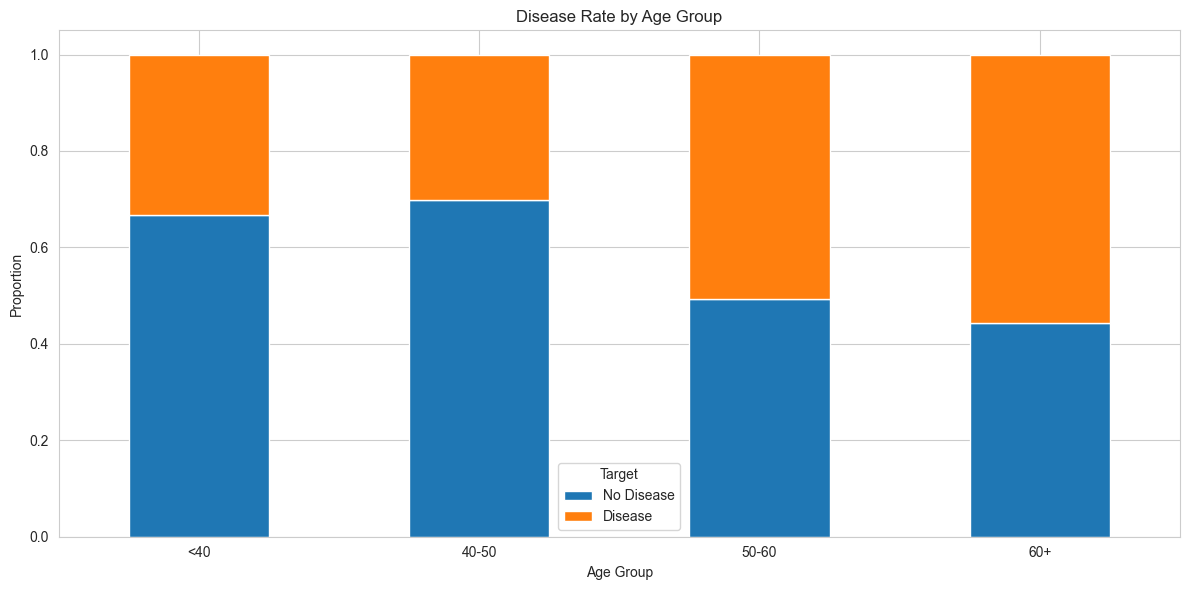

In [8]:

"""
## 8. Age Analysis
"""

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='target', y='age', palette='muted')
plt.title('Age Distribution by Target')
plt.xlabel('Heart Disease')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
age_bins = pd.cut(df['age'], bins=[0, 40, 50, 60, 100], labels=['<40', '40-50', '50-60', '60+'])
pd.crosstab(age_bins, df['target'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Disease Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [9]:

"""
## 9. Key Insights Summary
"""

insights = f"""
Key Insights from EDA:

1. Dataset Overview:
   - Total samples: {len(df)}
   - Features: {df.shape[1]}
   - Missing values: {df.isnull().sum().sum()}

2. Target Variable:
   - Disease cases: {(df['target'] == 1).sum()} ({(df['target'] == 1).sum()/len(df)*100:.1f}%)
   - No disease: {(df['target'] == 0).sum()} ({(df['target'] == 0).sum()/len(df)*100:.1f}%)

3. Top Correlations with Target:
{target_corr.head(6)}

4. Age Statistics:
   - Mean age: {df['age'].mean():.1f} years
   - Age range: {df['age'].min():.0f} - {df['age'].max():.0f} years

5. Next Steps:
   - Handle missing values
   - Feature engineering
   - Model training with cross-validation
"""

print(insights)


Key Insights from EDA:

1. Dataset Overview:
   - Total samples: 303
   - Features: 14
   - Missing values: 6

2. Target Variable:
   - Disease cases: 139 (45.9%)
   - No disease: 164 (54.1%)

3. Top Correlations with Target:
target     1.000000
thal       0.525689
ca         0.460442
exang      0.431894
oldpeak    0.424510
cp         0.414446
Name: target, dtype: float64

4. Age Statistics:
   - Mean age: 54.4 years
   - Age range: 29 - 77 years

5. Next Steps:
   - Handle missing values
   - Feature engineering
   - Model training with cross-validation

